# CMPINF 2100: Homework 06

## Vedant Kansara

### Assigned: Monday October 11, 2021

### DUE: Sunday October 17, 2021 at 11:00PM EST

You may add as many code and markdown cells as you see fit to answer the questions.

#### Write the name of your collaborators here

None.

### Overview

You will practice clustering algorithms to identify groups and patterns in data. The datasets are read in for you in each problem statement as Pandas DataFrames. The datasets associated with Problems 1 through 3 are converted for you to numpy arrays to facilitate using scikit-learn functions.

## Import modules

You will use the following modules in this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You will also use the following functions from scikit-learn and scipy.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Problem 01

The dataset for Problem 01 is read in for you below, as the Pandas DataFrame `df01`. To help, that DataFrame is converted to the numpy array `X01array` for you. The numpy array is more common to use with the scikit-learn functions you will use in this assignment.

In [3]:
url_01 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/06/hw06_prob01_df.csv'
df01 = pd.read_csv(url_01)

X01array = df01.to_numpy()

### 1a)

Confirm that the Pandas DataFrame `df01` and the numpy array `X01array` have the same number of rows and columns, but are of different data types.

#### 1a) - SOLUTION

In [4]:
df01.shape

(250, 4)

In [5]:
type(df01)

pandas.core.frame.DataFrame

In [6]:
X01array.shape

(250, 4)

In [7]:
type(X01array)

numpy.ndarray

### 1b)
Check the data types associated with the variables in `df01`, describe the summary statistics for each column, and create a basic boxplot to study the variation in the variables.

#### 1b) - SOLUTION

In [8]:
df01.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
dtype: object

In [9]:
df01.describe()

x1          x2          x3          x4
count  250.000000  250.000000  250.000000  250.000000
mean     2.848028    0.682076   -3.968923   -0.684954
std      2.154272    5.384747    4.507640    6.157443
min     -2.409022   -9.298360  -12.166980   -9.137334
25%      0.969350   -5.476945   -8.731078   -5.691938
50%      3.278778    1.693343   -3.854398   -3.138747
75%      4.630451    5.940885    0.569012    7.222664
max      6.593787    8.796690    3.530838    9.609468

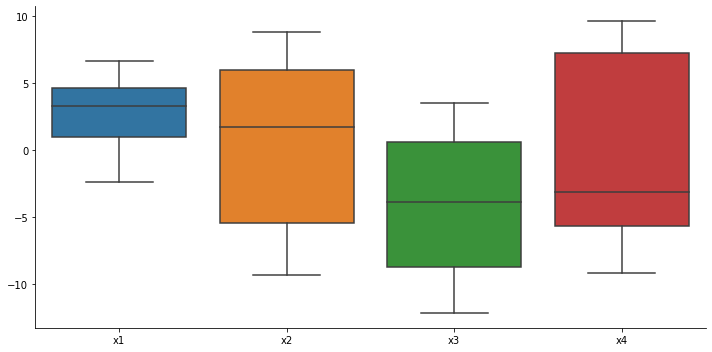

In [10]:
sns.catplot(data = df01, kind='box', aspect=2)
plt.show()

### 1c)
Create a pairs plot to study the pair-wise relationships between each of the variables in `df01`. Can you visually identify clusters or groups of observations?

#### 1c) - SOLUTION

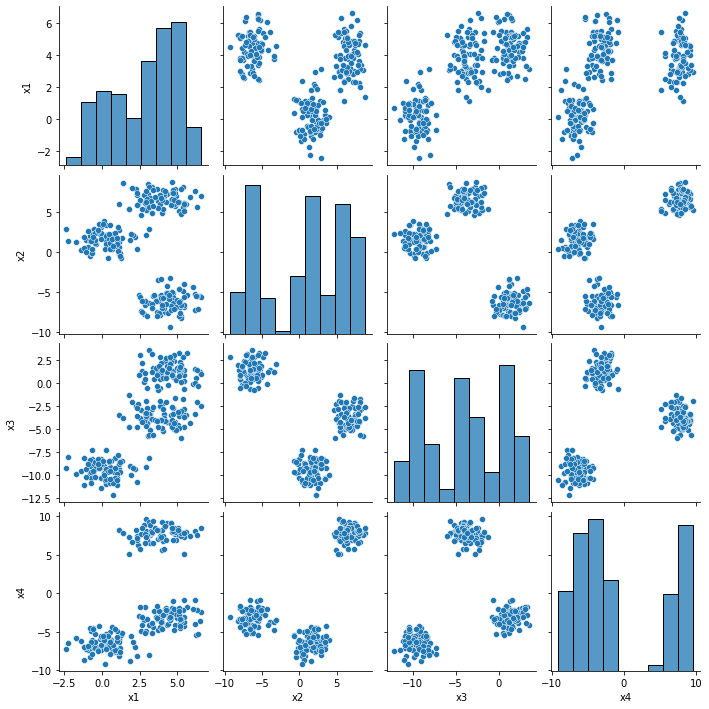

In [11]:
sns.pairplot(data = df01)

plt.show()

Yes we can visually identify each clusters in almost evry observation as the clusters are very distinct from each other

### 1d)
Use the `KMeans()` function to perform kmeans clustering on the data. You will first consider 2 clusters. You should select appropriate values for the `random_state`, `n_init`, and `max_iter` arguments.  

Use the `X01array` object which was created for you when executing the kmeans clustering algorithm.  

Assign the identified cluster labels to the variable `prob01_k2`.  

Check the number of unique values in the `prob01_k2` object.

#### 1d) - SOLUTION

In [12]:
prob01_k2 = KMeans(n_clusters = 2, random_state = 121, n_init = 25, max_iter = 500).fit_predict(X01array)

In [13]:
np.unique(prob01_k2)

array([0, 1])

### 1e)
Count the number of observations associated the two identified clusters.

#### 1e) - SOLUTION

In [14]:
df01['k2'] = pd.Series( prob01_k2, index=df01.index )

In [15]:
df01.k2.value_counts()

1    167
0     83
Name: k2, dtype: int64

### 1f)
Visualize the pairs plot again but this time color the markers based on the identified cluster labels.

#### 1f) - SOLUTION

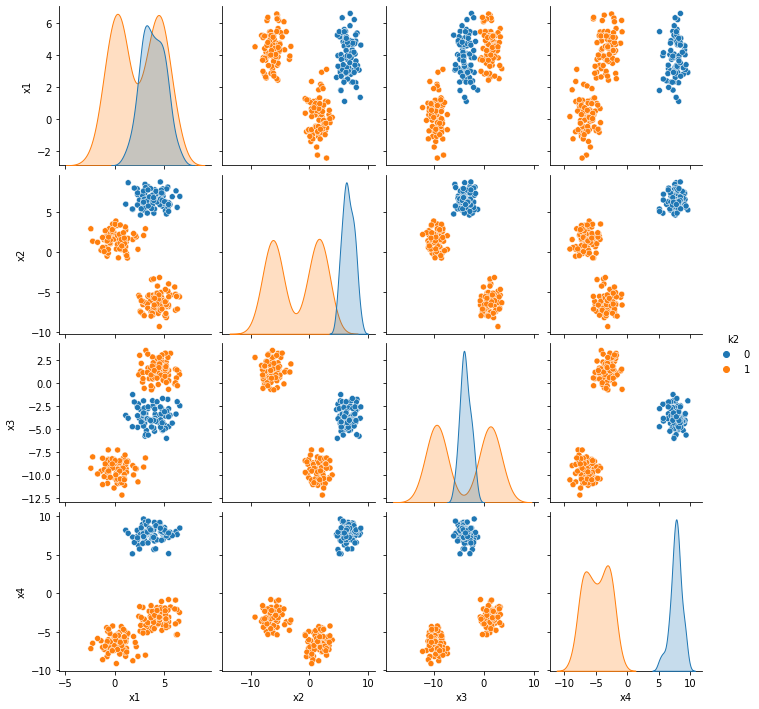

In [16]:
sns.pairplot(data = df01, hue='k2')

plt.show()

### 1g)
Reperform the Kmeans clustering, except this time use 3 clusters instead of 2. You should select appropriate values for the `random_state`, `n_init`, and `max_iter` arguments.  

Use the `X01array` object which was created for you when executing the kmeans clustering algorithm.  

Assign the identified cluster labels to the variable `prob01_k3`.  

Check the number of unique values in the `prob01_k3` object.

#### 1g) - SOLUTION

In [17]:
prob01_k3 = KMeans(n_clusters = 3, random_state = 121, n_init = 25, max_iter = 500).fit_predict(X01array)

In [18]:
np.unique(prob01_k3)

array([0, 1, 2])

### 1h)
Count the number of observations associated with each of the three identified clusters.

#### 1h) - SOLUTION

In [19]:
df01['k3'] = pd.Series( prob01_k3, index=df01.index)

In [20]:
df01.k3.value_counts()

1    84
2    83
0    83
Name: k3, dtype: int64

### 1i)
Visualize the pairs plot again but this time color the markers based on the three identified cluster labels.  

How do the identified clusters compare to your expenctation on the number of clusters from Problem 1c)?

#### 1i) - SOLUTION

In [21]:
df01['k2'] = df01.k2.astype('category')

df01['k3'] = df01.k3.astype('category')

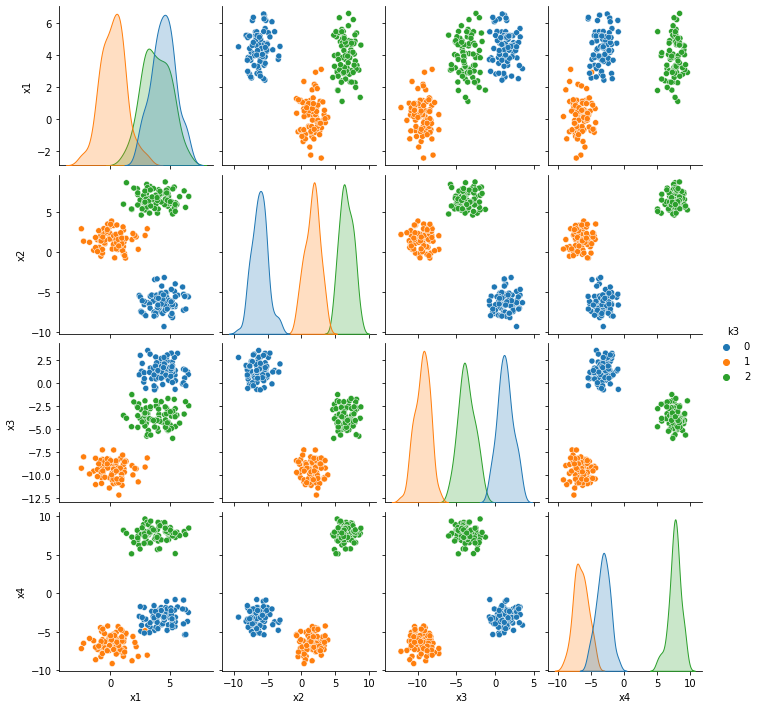

In [22]:
sns.pairplot(data = df01, hue='k3')

plt.show()

## Problem 02
Your identified 3 cluster groups in Problem 01, should appear to represent the patterns in the data. However, let's see what happens if you try out more clusters.

### 2a)
Reperform the Kmeans clustering, except this time use 9 clusters. You should select appropriate values for the `random_state`, `n_init`, and `max_iter` arguments.  

Use the `X01array` object which was created for you when executing the kmeans clustering algorithm.  

Assign the identified cluster labels to the variable `prob01_k9` (since it's still associated with the Problem 01 data).  

Check the number of unique values in the `prob01_k9` object.

#### 2a) - SOLUTION

In [23]:
prob01_k9 = KMeans(n_clusters = 9, random_state = 121, n_init = 25, max_iter = 500).fit_predict(X01array)

In [24]:
np.unique(prob01_k9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### 2b)
Count the number of observations associated with the 9 identified clusters.

#### 2b) - SOLUTION

In [25]:
df01['k9'] = pd.Series( prob01_k9, index=df01.index)

In [26]:
df01.k9.value_counts()

2    38
4    37
3    31
0    26
5    26
8    26
7    24
6    22
1    20
Name: k9, dtype: int64

### 2c)
Visualize the pairs plot again but this time color the markers based on the 9 identified cluster labels.

Visually, does this seem like an appropriate number of clusters to use? Why or why not?

#### 2c) - SOLUTION

In [27]:
df01['k9'] = df01.k9.astype('category')

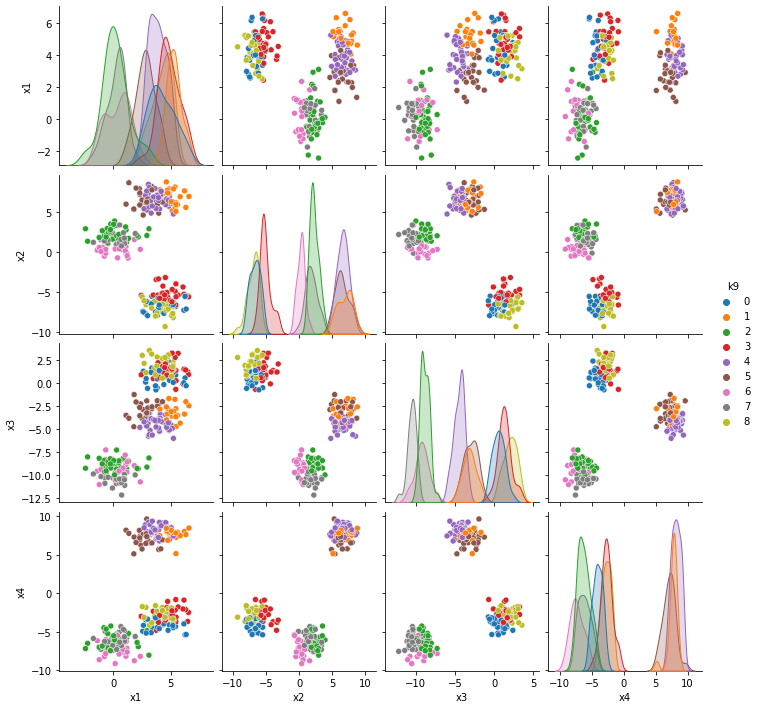

In [28]:
sns.pairplot(data = df01, hue='k9')

plt.show()

Visually this does not seem like appropriate number if crystals because we cannot differentiate each cluster from one another. 
The clusters are top of one another

### 2d)
Rather than continuing to try and visually assess more clusters, you will determine the optimal number of clusters using the "knee bend" heuristic based on the total within sum of squares.  

The total within sum of squares is stored within the `.inertia_` attribute of a fitted kmeans object. The cell below is started for you by initializing an empty list `tots_within`. You must complete the cell below by looping over 1 through 15 possible clusters. Fit the kmeans model, for each number of clusters (including the number of clusters you already used). Extract the total within sum of squares using the `.inertia_` attribute from the fitted object and `.append()` the result to the `tots_within` list.

#### 2d) - SOLUTION

In [29]:
tots_within = []

K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X01array)
    tots_within.append(km.inertia_)

C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2e)
Plot the total within sum of squares, `tots_within`, with respect to the number of clusters. You may use basic `plt.plot()` commands to create this figure.  

Based on your visualization and the "knee bend" heuristic, how many clusters would you recommend?

#### 2e) - SOLUTION


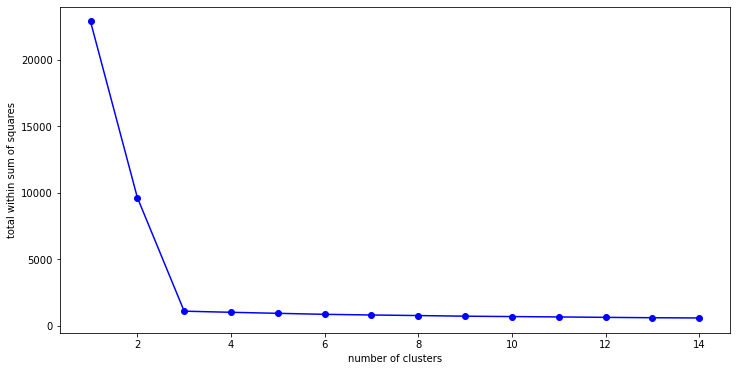

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

Based on the knee band we can recommed we should have just 3 clusters

## Problem 03

The dataset for Problem 03 is read in for you below, as the Pandas DataFrame `df03`. To help, that DataFrame is converted to the numpy array `X03array` for you. The numpy array is more common to use with the scikit-learn functions you will use in this assignment.

In [31]:
url_03 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/06/hw06_prob03_df.csv'
df03 = pd.read_csv(url_03)

X03array = df03.to_numpy()

### 3a)
How many rows and columns exist in `df03` and what are the data types associated with each column?

#### 3a) - SOLUTION

In [32]:
df03.shape

(250, 4)

In [33]:
df03.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
dtype: object

### 3b)
Describe the summary statistics for each column, and create a basic boxplot to study the variation in the variables in `df03`. What is different about the variables in `df03` compared to the variables in `df01`?

#### 3b) - SOLUTION

In [34]:
df03.describe()

x1          x2          x3           x4
count  250.000000  250.000000  250.000000   250.000000
mean    -2.542546   -0.875056   -1.742319   997.676171
std      4.612792    5.377312    5.038475   177.882827
min    -10.512325   -9.714752  -10.753056   751.606388
25%     -6.684338   -6.068994   -6.310836   820.536042
50%     -3.171585   -0.816839   -0.953580   981.641205
75%      1.565791    4.267897    2.942051  1177.098653
max      5.853405    6.743462    6.759024  1263.777451

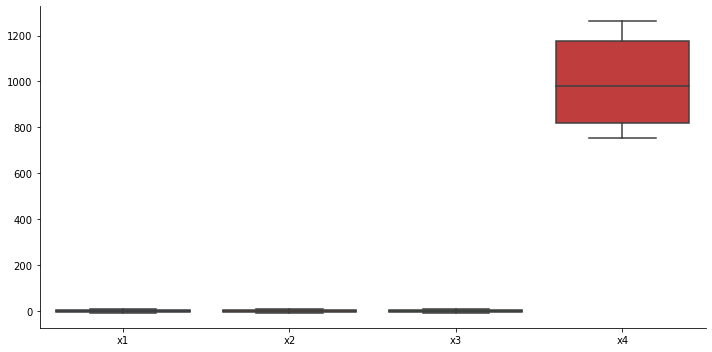

In [35]:
sns.catplot(data = df03, kind='box', aspect=2)
plt.show()

Compared to df01 the data in df03 is not scaled. The weight of the x4 variable in df03 is very high an hence we do not get appropriate answers.

### 3c)
Visualize the data in `df03` using a pairs plot. Based on your visualization how many groups do you expect to exist in the data?

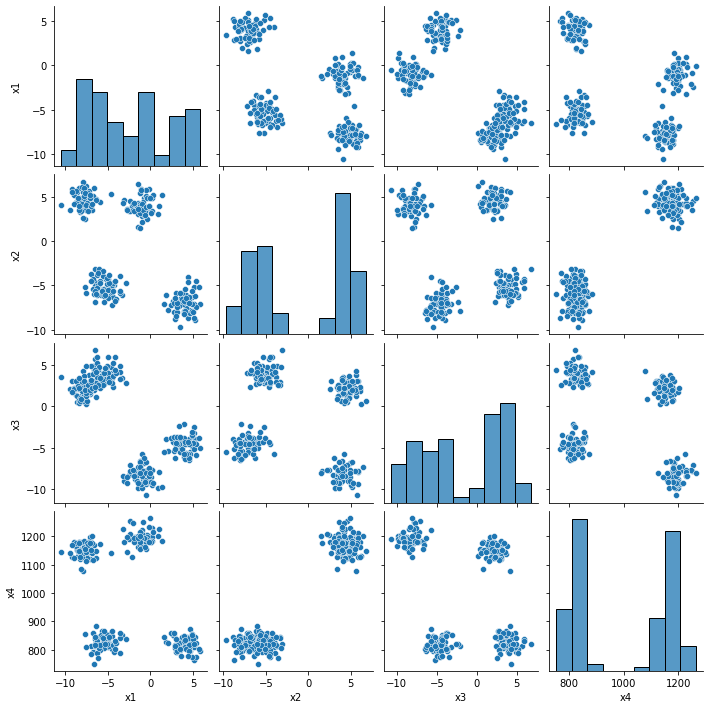

In [36]:
sns.pairplot(data = df03)

plt.show()

Based on visualization we can expect 4 different groups

#### 3c) - SOLUTION

### 3d)
Cluster the data in `df03` into 4 clusters using kmeans clustering.

Use the `X03array` object which was created for you when executing the kmeans clustering algorithm.  

Assign the identified cluster labels to the variable `prob03_k4`.  

Check the number of unique values in the `prob03_k4` object.

#### 3d) - SOLUTION

In [37]:
prob03_k4 = KMeans(n_clusters = 4, random_state = 121, n_init = 25, max_iter = 500).fit_predict(X03array)

In [38]:
np.unique(prob03_k4)

array([0, 1, 2, 3])

### 3e)
Count the number of observations associated with the identified clusters and visualize the cluster assignments using a pairs plot.  

Visually, do the results line up with what you expected the cluster groups to look like?

#### 3e) - SOLUTION

In [39]:
df03['k4'] = pd.Series( prob03_k4, index=df01.index) 

In [40]:
df03.k4.value_counts()

1    75
3    72
0    53
2    50
Name: k4, dtype: int64

In [41]:
df03['k4'] = df03.k4.astype('category')

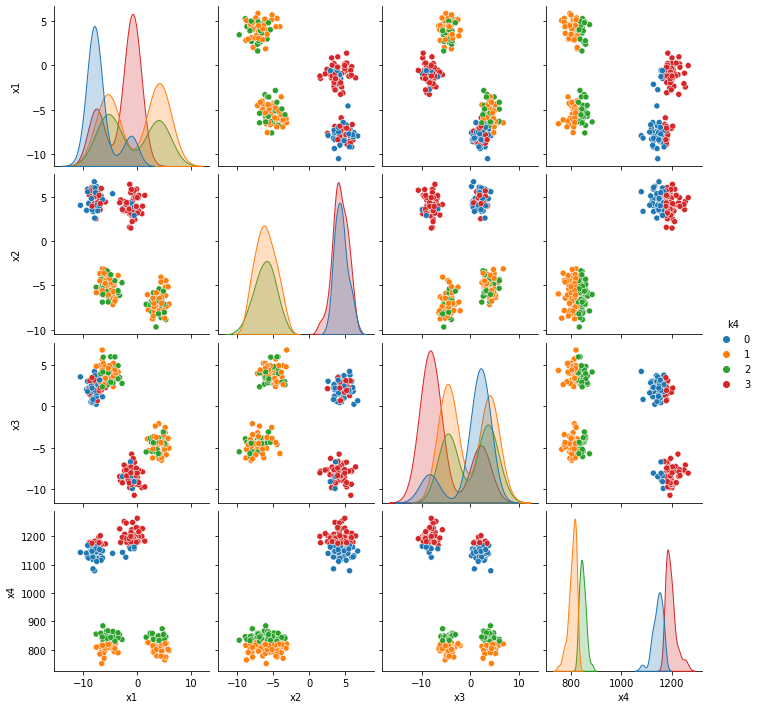

In [42]:
sns.pairplot(data = df03, hue='k4')

plt.show()

No the clusters do not line up as we thought because of the variable x4

### 3f)
You will now standardize `x1` through `x4` variables in `df03` before trying kmeans clustering again. Use the `StandardScaler()` to `.fit()` and then `.transform()` the data. Assign the standardized variables to the `X03stan` object. Check the number of rows and columns associated with `X03stan` as well as its data type.

#### 3f) - SOLUTION

In [43]:
X03stan = StandardScaler().fit_transform( df03 )

In [44]:
X03stan.shape

(250, 5)

In [45]:
type(X03stan)

numpy.ndarray

### 3g)
Cluster the data in `df03` into 4 clusters using kmeans clustering, but this time you must use the standardized data contained in the `X03stan` object.  

Assign the identified cluster labels to the variable `prob03_k4_stan`.  

Check the number of unique values in the `prob03_k4_stan` object and count the number of observations associated with each unique value.

#### 3g) - SOLUTION

In [46]:
prob03_k4_stan = KMeans(n_clusters=4, random_state=121, n_init=25, max_iter=500).fit_predict( X03stan )

In [47]:
np.unique(prob03_k4_stan)

array([0, 1, 2, 3])

### 3h)
Visualize the `x1` through `x4` variables again with a pairs plot, but this time color by the 4 clusters identified using the standardized variables. Do the cluster assignments agree with your expectations?

#### 3h) - SOLUTION

In [48]:
df03['k4'] = pd.Series( prob03_k4_stan, index=df03.index )

In [49]:
df03['k4'] = df03.k4.astype('category')

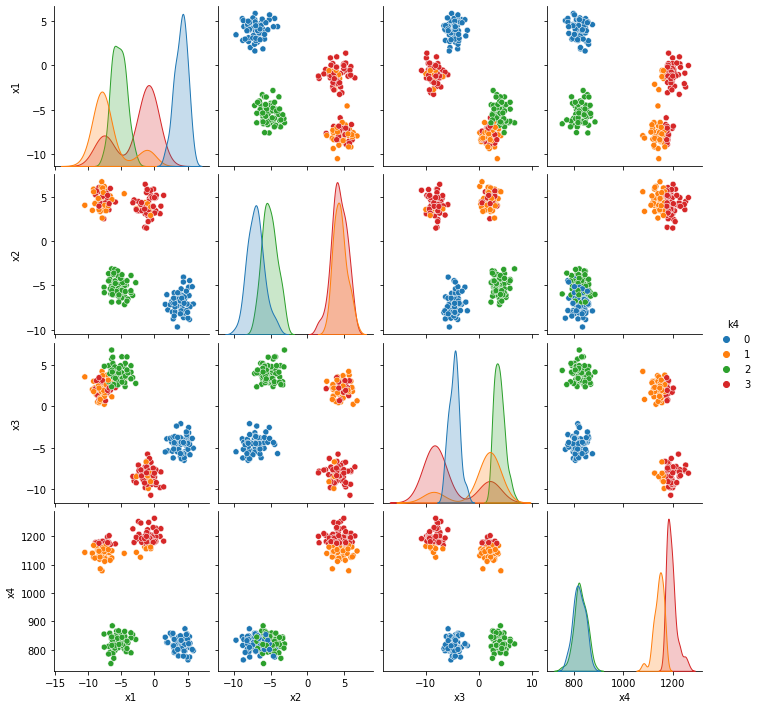

In [50]:
sns.pairplot(data = df03, hue = 'k4')

plt.show()

### 3i)
Create a boxplot for the standardized variables. Why does standardization help with the cluster analysis results for this problem?

#### 3i) - SOLUTION

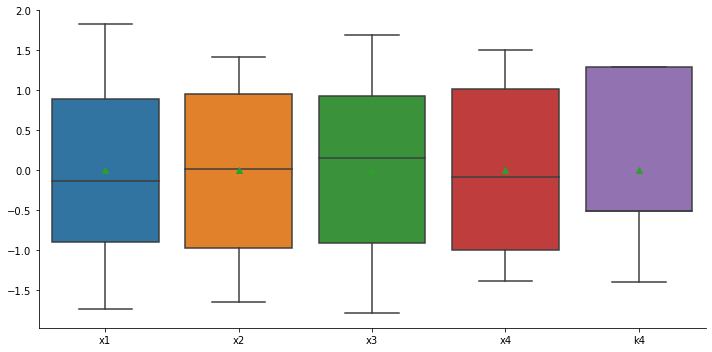

In [51]:
sns.catplot(data = pd.DataFrame(X03stan, columns=df03.columns), kind='box', aspect=2, showmeans=True)

plt.show()

## Problem 04
The dataset for problem 04 is read in for you in the cell below.

In [52]:
url_04 = 'https://raw.githubusercontent.com/jyurko/CMPINF_2100_Fall_2021/main/HW/06/hw06_prob04_df.csv'
df04 = pd.read_csv(url_04)

### 4a)
Check the number of rows and columns in `df04` and the data types associated with each variable. Are there any missing values in the dataset?

#### 4a) - SOLUTION

In [53]:
df04.shape

(450, 9)

In [54]:
df04.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
x8    float64
x9    float64
dtype: object

In [55]:
df04.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
x9    0
dtype: int64

There are no missing values in dataset

### 4b)
Describe the summary statistics for each column, and create a basic boxplot to study the variation in the variables in `df04`. Also, create a pairs plot to study the pair wise relationships between each variable. Note, the pairs plot may take a moment to generate for this data set.

#### 4b) - SOLUTION

In [56]:
df04.describe()

x1          x2          x3          x4          x5          x6  \
count  450.000000  450.000000  450.000000  450.000000  450.000000  450.000000   
mean     0.016107    0.092219   -0.582719   -0.600730   -0.411983   -0.049008   
std      1.704535    0.999853    1.469481    1.522090    1.525984    1.529120   
min     -3.948803   -3.582213   -4.739222   -4.278441   -5.260416   -3.876077   
25%     -1.228275   -0.549939   -1.464862   -1.672357   -1.412471   -1.236772   
50%      0.002448    0.120925   -0.842626   -0.752127   -0.534359   -0.302124   
75%      1.189048    0.770146   -0.015762    0.230120    0.583274    1.033819   
max      5.337331    3.389854    5.005992    5.102520    6.415328    4.588767   

               x7          x8          x9  
count  450.000000  450.000000  450.000000  
mean     0.197240   -1.055019   -0.032573  
std      2.929654    3.659923    1.578230  
min     -7.734967   -8.282880   -4.723072  
25%     -1.873157   -3.730327   -1.072683  
50%     -0.046833   -1.911394    0.093778  
75%      1.720336    1.512232    1.177946  
max     10.141738   15.488319    4.626475

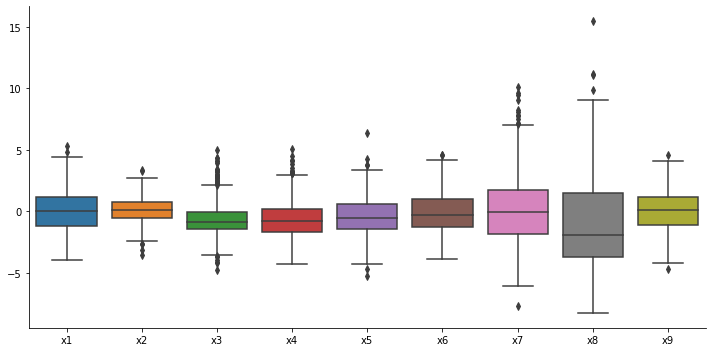

In [57]:
sns.catplot(data = df04, kind = 'box', aspect=2)

plt.show()

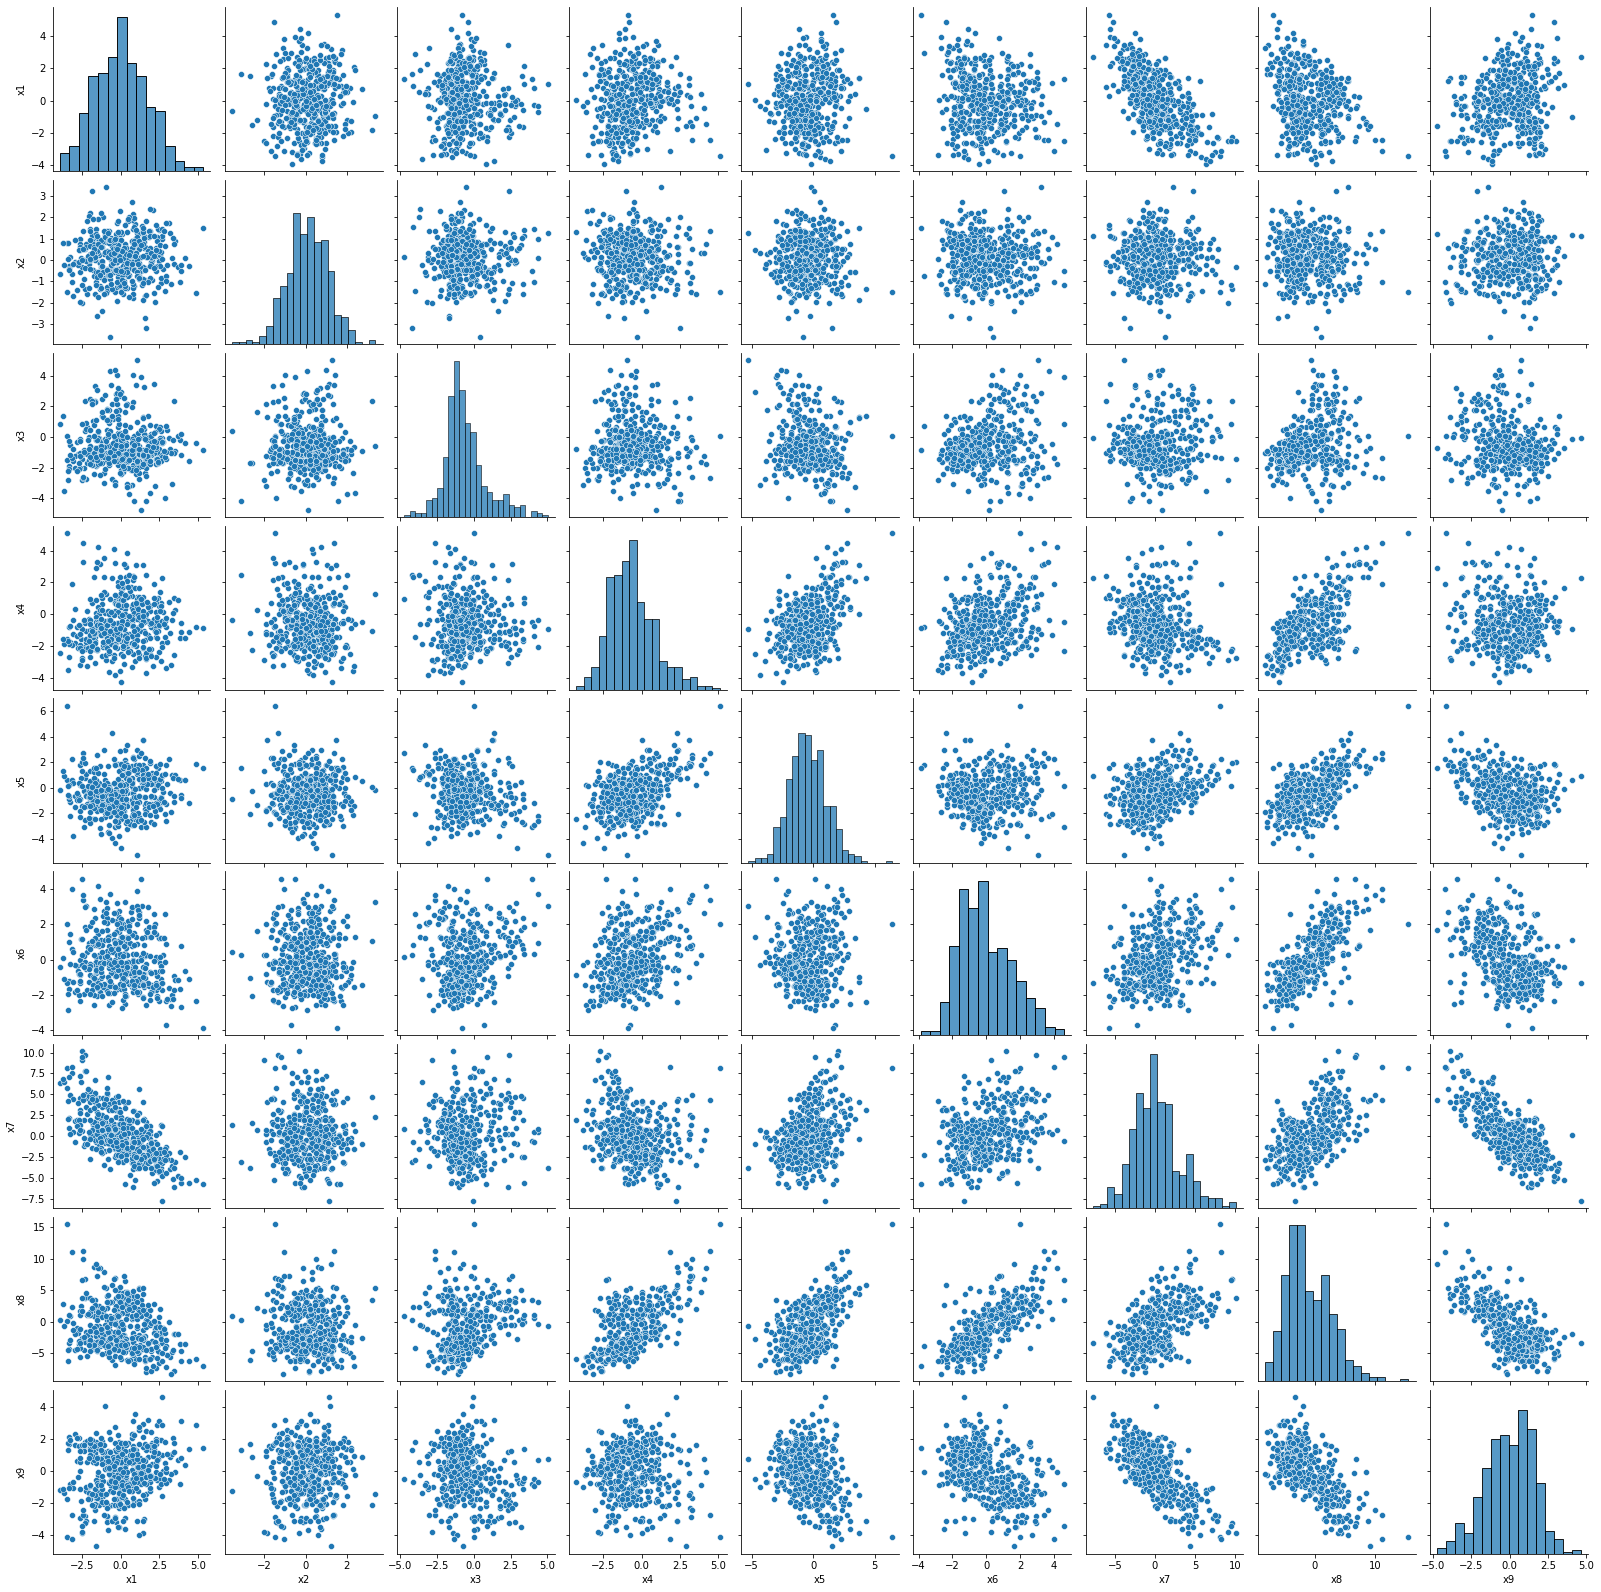

In [58]:
sns.pairplot(data = df04)

plt.show()

### 4c)
Visualize the correlation matrix between the variables in `df04`. You must use a diverging color palette to represent the correlation coefficient.

#### 4c) - SOLUTION

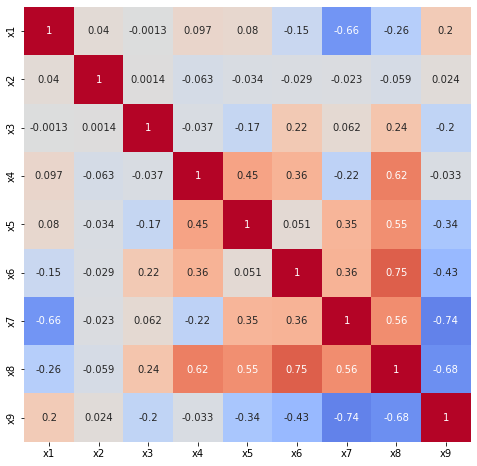

In [59]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data = df04.corr(),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

### 4d)
Standardize the variables in `df04` and assign the result to the `X04stan` object. Create a boxplot to visualize the variation of the standardized features.

#### 4d) - SOLUTION

In [60]:
X04stan = StandardScaler().fit_transform( df04 )

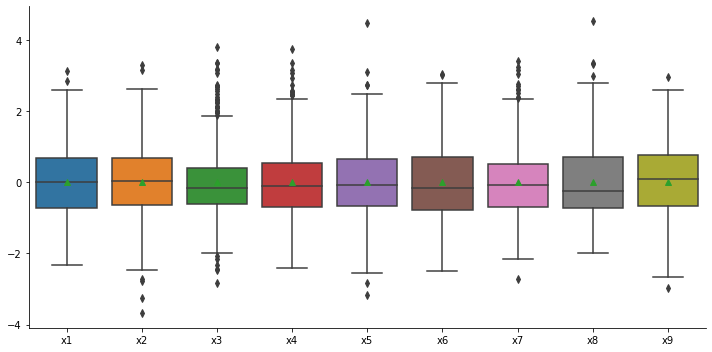

In [61]:
sns.catplot(data = pd.DataFrame(X04stan, columns=df04.columns), kind='box', aspect=2, showmeans=True)

plt.show()

### 4e)
Determine the optimal number of clusters to use with kmeans clustering based on the "knee bend" hueristic of the total within sum of squares. You must consider 1 up to 30 clusters. Plot the total within the sum of squares with respect to the number of clusters. 

#### 4e) - SOLUTION

In [62]:
tots_within = []

K = range(1, 30)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X04stan)
    tots_within.append(km.inertia_)

C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


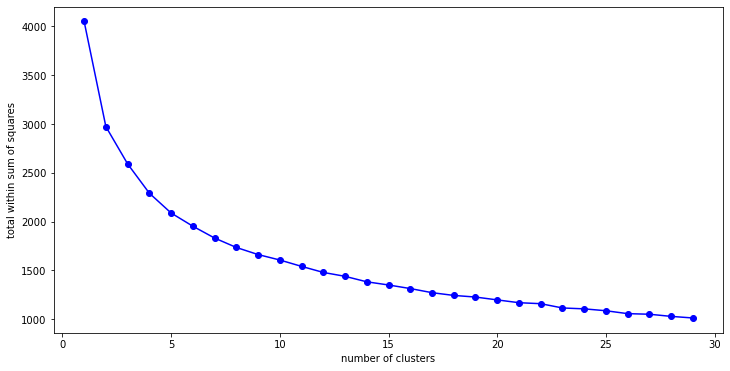

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

### 4f)
Perform KMeans clustering using your selected number of optimal clusters. Count the number of observations associated with each of the assigned clusters.

#### 4f) - SOLUTION

In [64]:
prob04_k3 = KMeans(n_clusters=3, random_state=121, n_init=25, max_iter=500).fit_predict( X04stan )

In [65]:
df04['k3'] = pd.Series( prob04_k3, index=df04.index )

df04['k3'] = df04.k3.astype('category')

In [66]:
df04.k3.value_counts()

0    262
1    104
2     84
Name: k3, dtype: int64

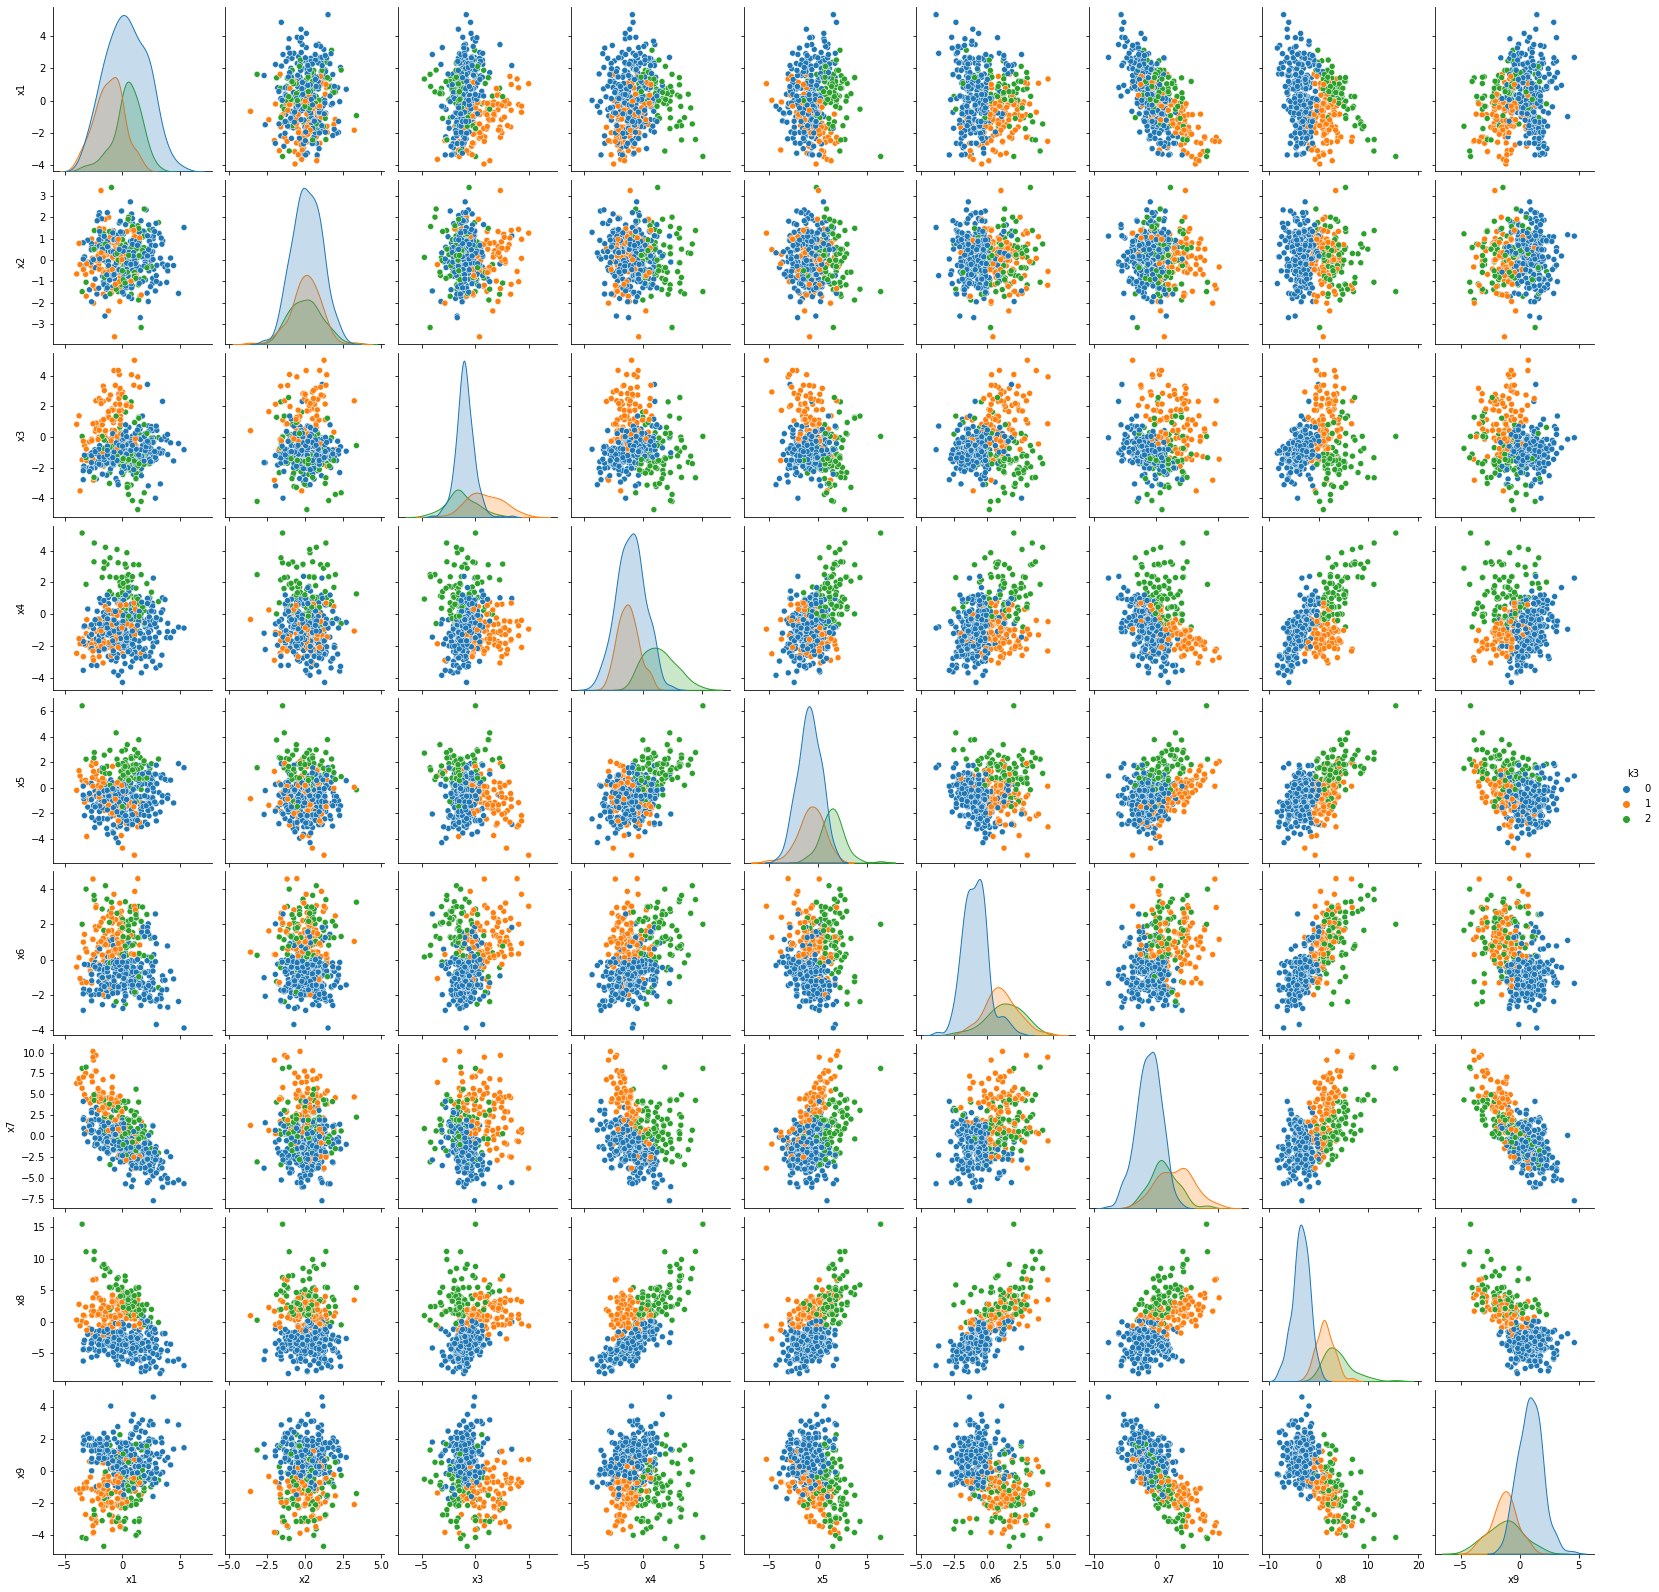

In [67]:
sns.pairplot(data = df04, hue='k3')

plt.show()

### 4g)
Rather than visualizing the cluster assignments associated with all pairs of scatter plots, let's use PCA to try and visualize the patterns in a reduced dimensional space. We will learn more about the details of PCA at the end of the semester, so for now, you will just use it as a tool to help with visualization.  

Determine the first two principal components. Perform the necessary operations such that you can store their values in a DataFrame with 2 columns, one named `'pc1'` and the second `'pc2'`. Name that object `prob04_pcs_df`.  

Use a boxplot to visualize the variability of the PCs.

#### 4g) - SOLUTION

In [68]:
pca_df04 = PCA(n_components=2).fit_transform( X04stan )

In [69]:
prob04_pcs_df = pd.DataFrame( pca_df04, columns=['pc-01', 'pc-02'])

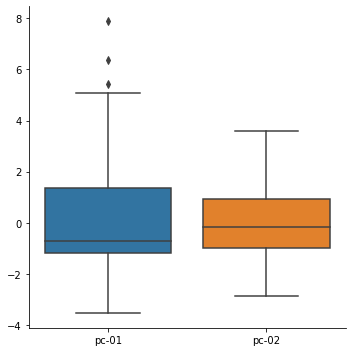

In [70]:
sns.catplot(data = prob04_pcs_df, kind='box')

plt.show()

### 4h)
Create a scatter plot between the first two PCs using Seaborn.

#### 4h) - SOLUTION

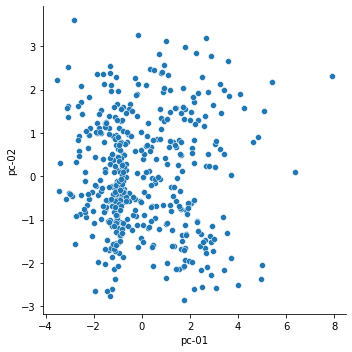

In [71]:
sns.relplot(data = prob04_pcs_df, x='pc-01', y='pc-02')

plt.show()

### 4i)
Create a scatter plot between the first two PCs again, but this time color by your identified optimal number of clusters.

#### 4i) - SOLUTION

In [72]:
prob04_pcs_df['k3'] = df04.k3

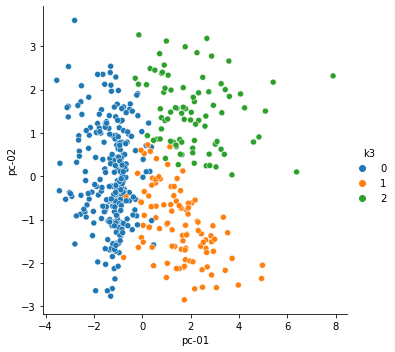

In [73]:
sns.relplot(data = prob04_pcs_df, x='pc-01', y='pc-02', hue='k3')

plt.show()

## Problem 05

### 5a)

You have practiced exploring data sets related to some of the final project datasets. Discuss how you could use clustering techniques in one of the final project datasets you have worked with so far. You do not need to perform the analysis. Discuss if the data you have worked with up to this point has a mixture of categorical and numeric variables, and how you can use the cluster results to better understand the data.

#### 5a) - SOLUTION



I have used PPG churn dataset up unitl now.

First we can standardize all the variables so we can compare them. Then we can make a piarplot can can identify visually which variables are most important in deciding whether the customer whill churn or not. From the line plot then we can decide how many clusters we require.

We can all use the categorical variables such as `X03`,`X04`,`X05` to futher differentiate and see how the variable differes based on this categorical data types. 

### 5b)

Discuss how you could use clustering in an application of your own choosing. You do not need to perform the analysis, just describe an application you have worked on, thought about, or heard about, and discuss how clustering methods could help you find interesting patterns in that application.

#### 5b) - SOLUTION



We use clustering to seperate data points with similar groups.

This can be very helpful to find patterns. As we saw in the penguins data set when we compared two variables `flipper_length_mm` and `bill_depth_mm` before clustering we found a that the variables are inversly related. But when we comapre after clustering we can find how the variable are related between different species and also visually see the difference between the values and can coclude that relation between variable is different for each species